## Distance Based on Autocorrelation

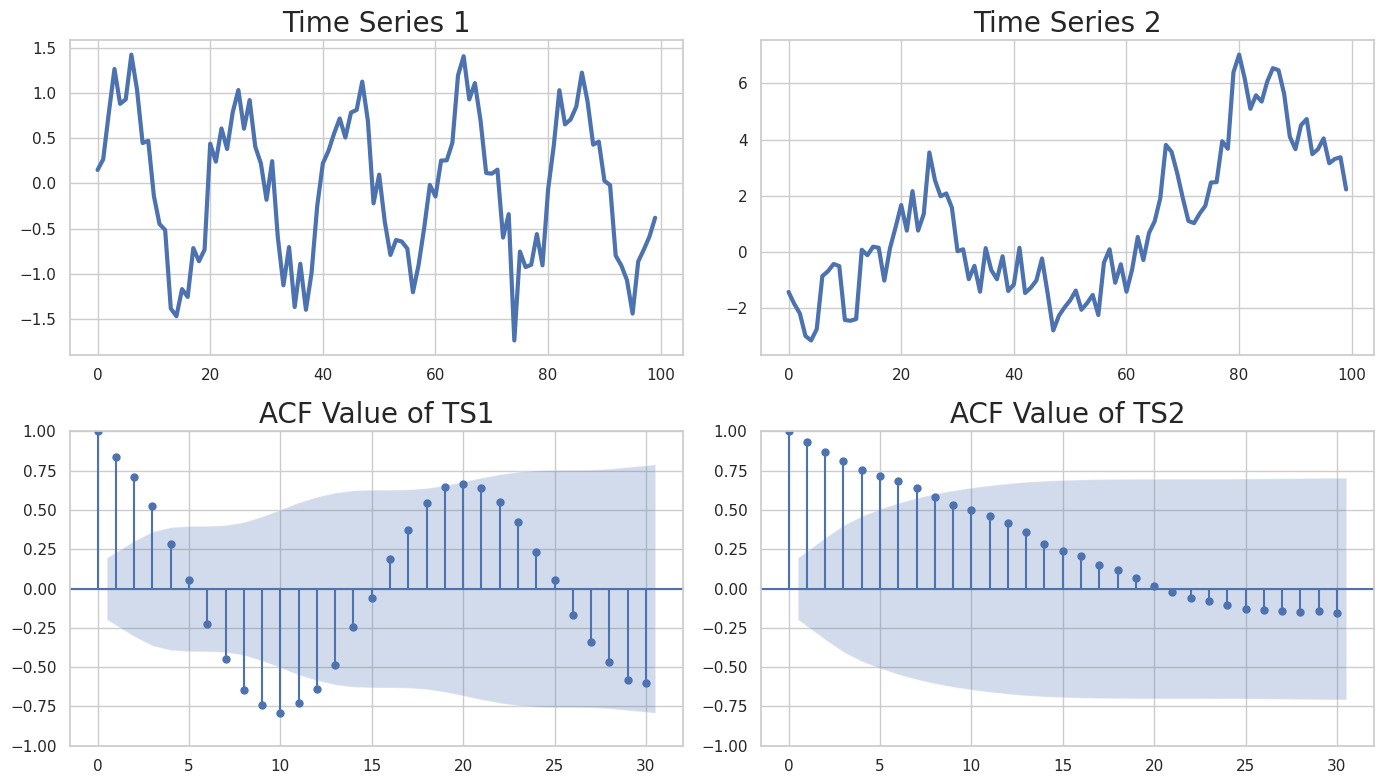

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

sns.set_theme(style="whitegrid")

np.random.seed(42)

n = 100

t = np.arange(n)
ts1 = np.sin(2 * np.pi * t / 20) + np.random.normal(0, 0.3, n)

ts2 = np.cumsum(np.random.normal(0, 1, n))

plt.figure(figsize=(14, 8))

title_fontsize = 20
legend_fontsize = 10
line_width = 3.0


plt.subplot(2, 2, 1)
plt.plot(ts1, label='Time Series 1', linewidth=line_width)
plt.title('Time Series 1', fontsize=title_fontsize)
# plt.legend(fontsize=legend_fontsize)

plt.subplot(2, 2, 2)
plt.plot(ts2, label='Time Series 2', linewidth=line_width)
plt.title('Time Series 2', fontsize=title_fontsize)
# plt.legend(fontsize=legend_fontsize)

# draw Autocorrelation（lags=30）
plt.subplot(2, 2, 3)
plot_acf(ts1, ax=plt.gca(), lags=30)
plt.title('ACF Value of TS1', fontsize=title_fontsize)

plt.subplot(2, 2, 4)
plot_acf(ts2, ax=plt.gca(), lags=30)
plt.title('ACF Value of TS2', fontsize=title_fontsize)

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import acf

# calculate ACF vector
lags = 30
acf_ts1 = acf(ts1, nlags=lags)
acf_ts2 = acf(ts2, nlags=lags)


acf_diff = acf_ts1 - acf_ts2
print(acf_diff.shape)


Omega_dict = {
    "Identity Matrix": np.eye(lags + 1),  
    "Linear Decay": np.diag(1 / (np.arange(lags + 1) + 1)),  
    "Exponential Decay": np.diag(np.exp(-0.2 * np.arange(lags + 1))), 
    "High Weight on Lag 1": np.eye(lags + 1) * 0.5,
}
Omega_dict["High Weight on Lag 1"][1, 1] = 5  

print("ACF Distance under different weight matrices:")
for name, Omega in Omega_dict.items():
    distance = np.sqrt(acf_diff @ Omega @ acf_diff.T)
    print(f"{name}: {distance:.4f}")

(31,)
ACF Distance under different weight matrices:
Identity Matrix: 3.7306
Linear Decay: 1.1380
Exponential Decay: 1.4276
High Weight on Lag 1: 2.6451
